In [1]:
# import requests
from __future__ import print_function    # (at top of module)
import time
import sys
import os
import pandas as pd
import numpy as np

PROJ_ROOT = os.path.join(os.getcwd(), os.pardir)

%load_ext watermark
%watermark -a "Thomas Turner" -d -t -v -p numpy,pandas -g

Thomas Turner 07/28/2016 14:57:49 

CPython 3.5.2
IPython 5.0.0

numpy 1.11.1
pandas 0.18.1
Git hash: dbbdc8ab6587ed55beeb35838827392d281af4f5


In [80]:
# load environment variables from .env file using dotenv.
from dotenv import load_dotenv
dotenv_path = os.path.join(PROJ_ROOT, '.env')
load_dotenv(dotenv_path)

# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(PROJ_ROOT, 'src')
sys.path.append(src_dir)

# import my method from the source code
%aimport data.spotipy_functions
from data.spotipy_functions import get_tracks_from_playlist
from data.spotipy_functions import features_list
from data.spotipy_functions import get_recommends_from_seed

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
playlists = pd.read_csv(os.path.join(PROJ_ROOT,'data','raw','spotify_playlists.csv'))

In [5]:
playlists

,playlist_id,playlist_name,user_id
0,2Ejbdf2DC9JGr5qdT0Z852,Old School Hip Hop House Party,spotify_uk_
1,7wUUwoxU2S6BRKA2bDPYKD,Massive dance hits,spotify_uk_
2,2aUKPl1SatBDloOMrR1hAp,Indie Roadtrip,spotify_uk_
3,5O2ERf8kAYARVVdfCKZ9G7,Coffee Table Jazz,spotify
4,6CRNGyV2hoQDyYpUPjHrkz,Top Classical,spotify
5,4EMB7RVcDBWTJDzsr1jXMe,Spin Deep House 40,goldjr


In [6]:
data_array = []
for i in range(6):
    print(i)
    table = features_list(get_tracks_from_playlist(playlists.ix[i,2],playlists.ix[i,0]))
    table['playlist_id'] = playlists.ix[i,0]
    table['playlist_name'] = playlists.ix[i,1]
    table['data_set'] = i
    data_array.append(table)
master_dataset = pd.concat(data_array)



0
1
2
3
4
5


In [8]:
master_dataset.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,...,speechiness,tempo,time_signature,track_href,type,uri,valence,playlist_id,playlist_name,data_set
0,0.2500,https://api.spotify.com/v1/audio-analysis/2Dts...,0.750,244227,0.825,2Dts49OexROL2KvCK2sokf,0.0,11,0.1950,-0.150,...,0.2690,92.028,4,https://api.spotify.com/v1/tracks/2Dts49OexROL...,audio_features,spotify:track:2Dts49OexROL2KvCK2sokf,0.741,2Ejbdf2DC9JGr5qdT0Z852,Old School Hip Hop House Party,0
1,0.0318,https://api.spotify.com/v1/audio-analysis/06jU...,0.601,219053,0.806,06jUyksEtBcrcXoYMOli1M,0.0,10,0.0869,-6.492,...,0.2330,94.842,4,https://api.spotify.com/v1/tracks/06jUyksEtBcr...,audio_features,spotify:track:06jUyksEtBcrcXoYMOli1M,0.634,2Ejbdf2DC9JGr5qdT0Z852,Old School Hip Hop House Party,0
2,0.0550,https://api.spotify.com/v1/audio-analysis/3u9f...,0.640,240973,0.583,3u9fHuAtjMY1RW2mZfO4Cf,0.0,8,0.4960,-7.734,...,0.0485,79.966,4,https://api.spotify.com/v1/tracks/3u9fHuAtjMY1...,audio_features,spotify:track:3u9fHuAtjMY1RW2mZfO4Cf,0.435,2Ejbdf2DC9JGr5qdT0Z852,Old School Hip Hop House Party,0
3,0.1960,https://api.spotify.com/v1/audio-analysis/6wni...,0.504,244907,0.804,6wninWNdit2Bc0lz8kTGEk,0.0,10,0.2700,-7.368,...,0.3670,174.076,4,https://api.spotify.com/v1/tracks/6wninWNdit2B...,audio_features,spotify:track:6wninWNdit2Bc0lz8kTGEk,0.775,2Ejbdf2DC9JGr5qdT0Z852,Old School Hip Hop House Party,0
4,0.1010,https://api.spotify.com/v1/audio-analysis/0Zh5...,0.926,222333,0.733,0Zh5U48tZNeAzzLTV1CVBE,0.0,8,0.1790,-1.294,...,0.0647,133.966,4,https://api.spotify.com/v1/tracks/0Zh5U48tZNeA...,audio_features,spotify:track:0Zh5U48tZNeAzzLTV1CVBE,0.646,2Ejbdf2DC9JGr5qdT0Z852,Old School Hip Hop House Party,0


In [85]:
recommends = get_recommends_from_seed(['1ohelc8DR2NNpUGukeCnGY'],100)

In [125]:
useful_features = ['acousticness','danceability','energy','speechiness','tempo','valence']

recomms_with_features = features_list(recommends)
recomms_with_features.tempo = list(map(lambda x: x/2 if (x>170) else x*2 if (x<70) else x, recomms_with_features.tempo))


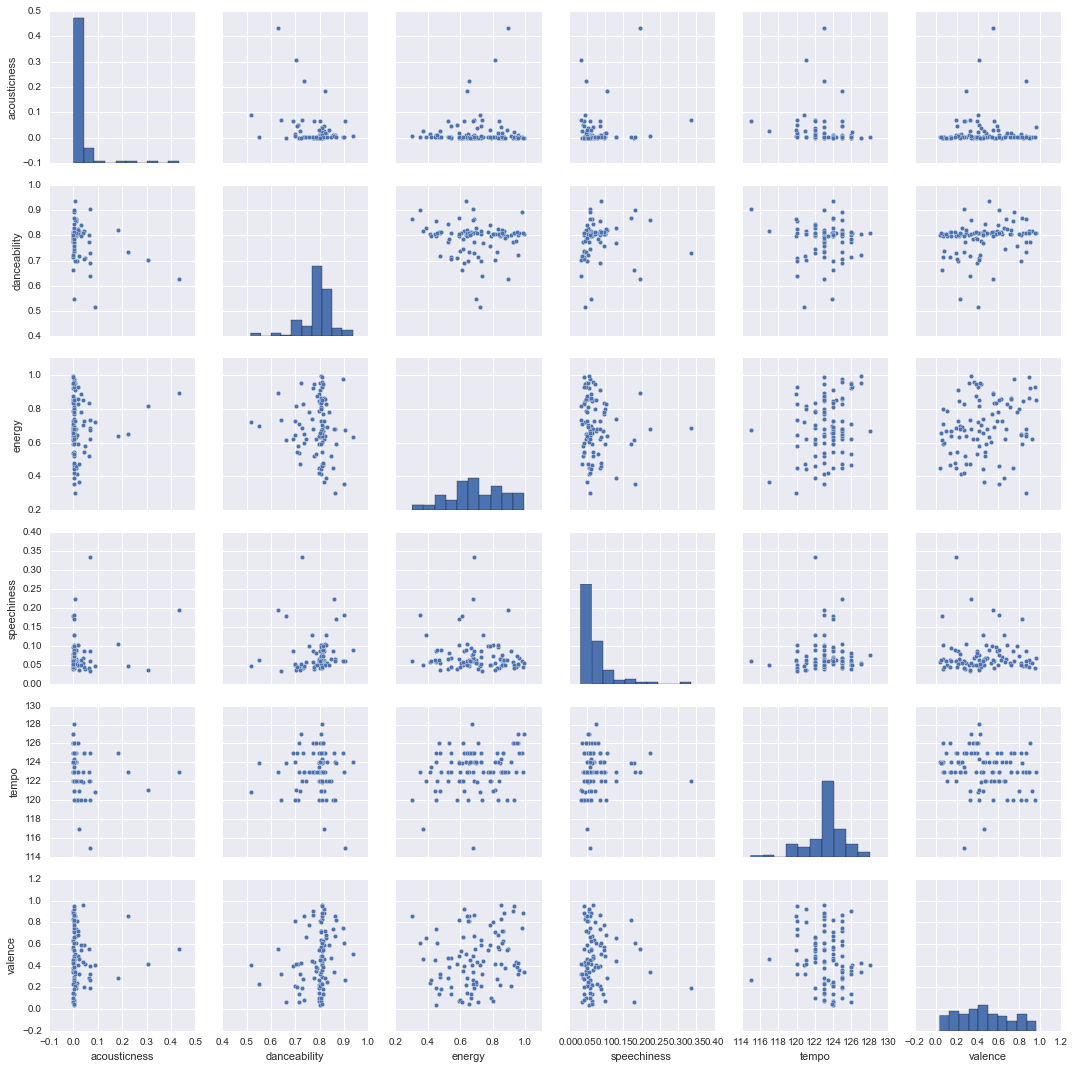

In [126]:
import seaborn as sb
sb.pairplot(recomms_with_features[useful_features])